# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [4]:
# [Answer to ex. 12.1.1 here]
import pandas as pd
df = pd.read_csv(r"C:\Users\Tobias\Documents\ØK\SDS-econometrics\peer_effects_room.csv")
df.head()

,person,room,high_school_GPA,college_GPA
0,0,351,-1.715472,-1.285307
1,1,738,-0.530190,-0.031833
2,2,247,-0.589543,-0.203230
3,3,751,-1.303115,0.982488
4,4,698,0.156678,-0.371632


In [2]:
import numpy as np
room = df.groupby('room').person.unique()
room

room
0      [1603, 1757]
1       [466, 1649]
2       [816, 1929]
3       [481, 1719]
4      [1108, 1887]
           ...     
995    [1094, 1720]
996       [26, 890]
997    [1420, 1855]
998     [146, 1740]
999     [692, 1810]
Name: person, Length: 1000, dtype: object

In [5]:
df = df.merge(df, left_on="room", right_on="room", how="left", suffixes=["", "_other"])
# remove duplicate because i'm to lazy to do the correct merge
df = df[df.person != df.person_other]
df.head()

,person,room,high_school_GPA,college_GPA,person_other,high_school_GPA_other,college_GPA_other
1,0,351,-1.715472,-1.285307,1645,-0.818594,-0.434847
3,1,738,-0.530190,-0.031833,1039,-0.493444,0.299729
5,2,247,-0.589543,-0.203230,944,1.281112,-0.479543
7,3,751,-1.303115,0.982488,1099,-1.812137,-2.267394
9,4,698,0.156678,-0.371632,1708,-0.327219,0.670683


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

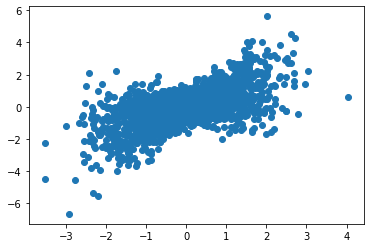

In [7]:
# [Answer to ex. 12.1.3 here]
import matplotlib.pyplot as plt
plt.scatter(df.high_school_GPA, df.college_GPA)

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

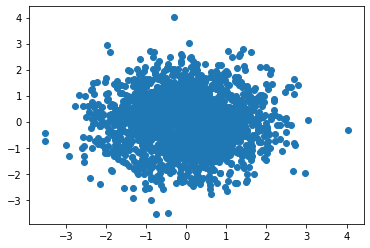

In [8]:
# [Answer to ex. 12.1.4 here]
plt.scatter(df.high_school_GPA, df.high_school_GPA_other)

In [11]:
import statsmodels.api as sm
model   = sm.OLS(df.high_school_GPA, df.high_school_GPA_other)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        high_school_GPA   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                            0.05536
Date:                Thu, 21 May 2020   Prob (F-statistic):                       0.814
Time:                        21:58:24   Log-Likelihood:                         -2884.4
No. Observations:                2000   AIC:                                      5771.
Df Residuals:                    1999   BIC:                                      5776.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
high_school_GPA_other    -0.0053      0.022     -0.235      0.814      -0.049       0.039
==============================================================================
Omnibus:                        0.233   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.290
Skew:                           0.015   Prob(JB):                        0.865
Kurtosis:                       2.949   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

In [14]:
# [Answer to ex. 12.1.5 here]

y  = df['college_GPA']
X   = df[['high_school_GPA','high_school_GPA_other']]
model   = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            college_GPA   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.402
Method:                 Least Squares   F-statistic:                              673.0
Date:                Thu, 21 May 2020   Prob (F-statistic):                   3.58e-224
Time:                        22:01:07   Log-Likelihood:                         -2586.7
No. Observations:                2000   AIC:                                      5177.
Df Residuals:                    1998   BIC:                                      5189.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
high_school_GPA           0.7065      0.019     36.649      0.000       0.669       0.744
high_school_GPA_other     0.0362      0.019      1.880      0.060      -0.002       0.074
==============================================================================
Omnibus:                       77.511   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.691
Skew:                          -0.117   Prob(JB):                     6.53e-47
Kurtosis:                       4.580   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [ ]:
# [Answer to ex. 12.1.6 here]

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.